In [335]:
import numpy as np
import random
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import pandas as p
from scipy.spatial import distance
import seaborn as sns

from itertools import combinations
import Levenshtein
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt
import os

In [378]:
method = 'WSN_699'
# method = 'NNNSW'
method = 'NNNSW_700'

In [379]:
fastas = SeqIO.parse(f'{method}/random_sequences.fasta',"fasta")
bc_dict = {record.id:record.seq for record in wsn_fastas}

In [380]:
probe_dict = {}

In [381]:
probe_df = p.DataFrame(columns=['bc_id','bc_seq','n_probes','probe_id','GC','TM','FE','probe_seq','probe_name'])

for id,seq in wsn_bc_dict.items():
    filename = f'{method}/all_probes_28/{id}_oligos.txt'
    if os.path.isfile(filename):
        probes = p.read_csv(filename,sep='\t',names=['probe_id','GC','TM','FE','probe_seq','probe_name'])
        probes['n_probes'] = len(probes)
        probes['bc_id'] = id
        probes.insert(0,'bc_seq',str(seq))

        probe_df = probe_df.merge(probes,how='outer',on=['bc_id','bc_seq','n_probes','probe_id','GC','TM','FE','probe_seq','probe_name'])

# probe_df = p.DataFrame(probe_df,columns=['bc_id','bc_seq','n_probes','probe_seq','probe_name'])

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_52761/2911467520.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(probe_df[probe_df['probe_id']==1]['n_probes'],bins=np.arange(9.5,22.5),kde=False)


<Axes: xlabel='n_probes'>

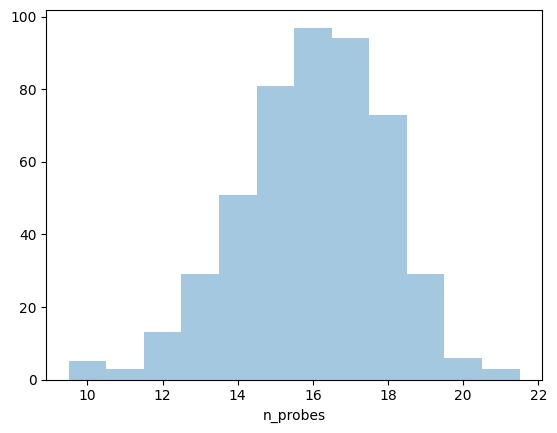

In [382]:
# sns.distplot(probe_df[probe_df['probe_id']==1]['n_probes'],bins=np.arange(14.5,27.5),kde=False)
sns.distplot(probe_df[probe_df['probe_id']==1]['n_probes'],bins=np.arange(9.5,22.5),kde=False)
# sns.distplot(probe_df[probe_df['probe_id']==1]['n_probes'],kde=False)

In [385]:
many_probes = probe_df[probe_df['n_probes']>17]
print(len(np.unique(many_probes['bc_id'])))
print(len(np.unique(probe_df['bc_id'])))

111
484


In [386]:
strings = many_probes['probe_seq'].values
string_names = many_probes['probe_name'].values
bc_ids = many_probes['bc_id'].values
distances = np.asarray([Levenshtein.distance(i, j) for (i, j) in combinations(strings, 2)])
# distances = np.asarray([Levenshtein.hamming(i, j) for (i, j) in combinations(strings, 2)])
distance_matrix = squareform(distances)  # if needed



# distance.pdist([list(x) for x in many_probes['probe_seq'].values],metric='hamming')

In [387]:
def dist_ind_to_pair_ind(d, i):
    """Returns the pair of indices associated with squareform from distance index
    d: length of each side of the matrix
    i: the index you care about within the distance returned by pdist or Levenshtein, for instance
    
    """
    
    b = 1 - 2 * d
    x = np.floor((-b - np.sqrt(b**2 - 8*i))/2).astype(int)
    y = (i + x * (b + x + 2) / 2 + 1).astype(int)
    return (x,y)

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_52761/497150808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distances,kde=False)


3 or closer 0
4 or closer 0
5 or closer 1


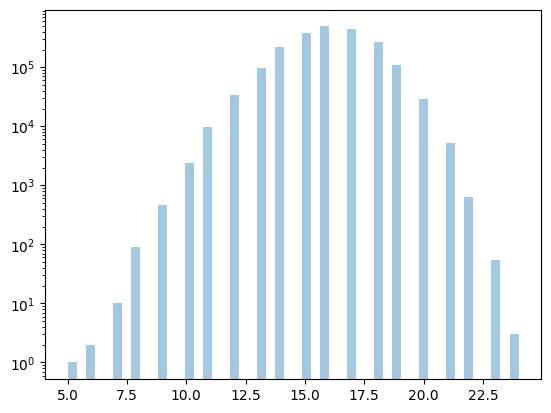

In [391]:
sns.distplot(distances,kde=False)
print('3 or closer',sum(distances < 4))
print('4 or closer',sum(distances < 5))
print('5 or closer',sum(distances < 6))
plt.yscale('log')

In [389]:
import networkx as nx
G = nx.Graph()

bcs_with_close_probes = []

cutoff = 8
G.add_nodes_from(many_probes['bc_id'].values)

for ix in np.where((distances < cutoff) & (distances > 0))[0]:
    
    x = dist_ind_to_pair_ind(int(len(string_names)),ix)[0]
    y = dist_ind_to_pair_ind(int(len(string_names)),ix)[1]
    
    bcs_with_close_probes.append(bc_ids[x])
    bcs_with_close_probes.append(bc_ids[y])
    print(bc_ids[x],bc_ids[y],string_names[x],string_names[y],distance_matrix[x,y])
    
    G.add_edge(bc_ids[x],bc_ids[y])

BC_013 BC_071 NNNSW_700/all_probes_28/BC_013_17 NNNSW_700/all_probes_28/BC_071_7 7
BC_022 BC_212 NNNSW_700/all_probes_28/BC_022_7 NNNSW_700/all_probes_28/BC_212_14 7
BC_029 BC_071 NNNSW_700/all_probes_28/BC_029_18 NNNSW_700/all_probes_28/BC_071_15 7
BC_038 BC_164 NNNSW_700/all_probes_28/BC_038_12 NNNSW_700/all_probes_28/BC_164_17 7
BC_040 BC_209 NNNSW_700/all_probes_28/BC_040_18 NNNSW_700/all_probes_28/BC_209_18 7
BC_098 BC_112 NNNSW_700/all_probes_28/BC_098_17 NNNSW_700/all_probes_28/BC_112_5 7
BC_099 BC_120 NNNSW_700/all_probes_28/BC_099_14 NNNSW_700/all_probes_28/BC_120_13 5
BC_119 BC_148 NNNSW_700/all_probes_28/BC_119_11 NNNSW_700/all_probes_28/BC_148_11 7
BC_127 BC_238 NNNSW_700/all_probes_28/BC_127_6 NNNSW_700/all_probes_28/BC_238_3 7
BC_209 BC_231 NNNSW_700/all_probes_28/BC_209_3 NNNSW_700/all_probes_28/BC_231_15 7
BC_213 BC_274 NNNSW_700/all_probes_28/BC_213_8 NNNSW_700/all_probes_28/BC_274_16 7
BC_239 BC_408 NNNSW_700/all_probes_28/BC_239_6 NNNSW_700/all_probes_28/BC_408_2 6
B

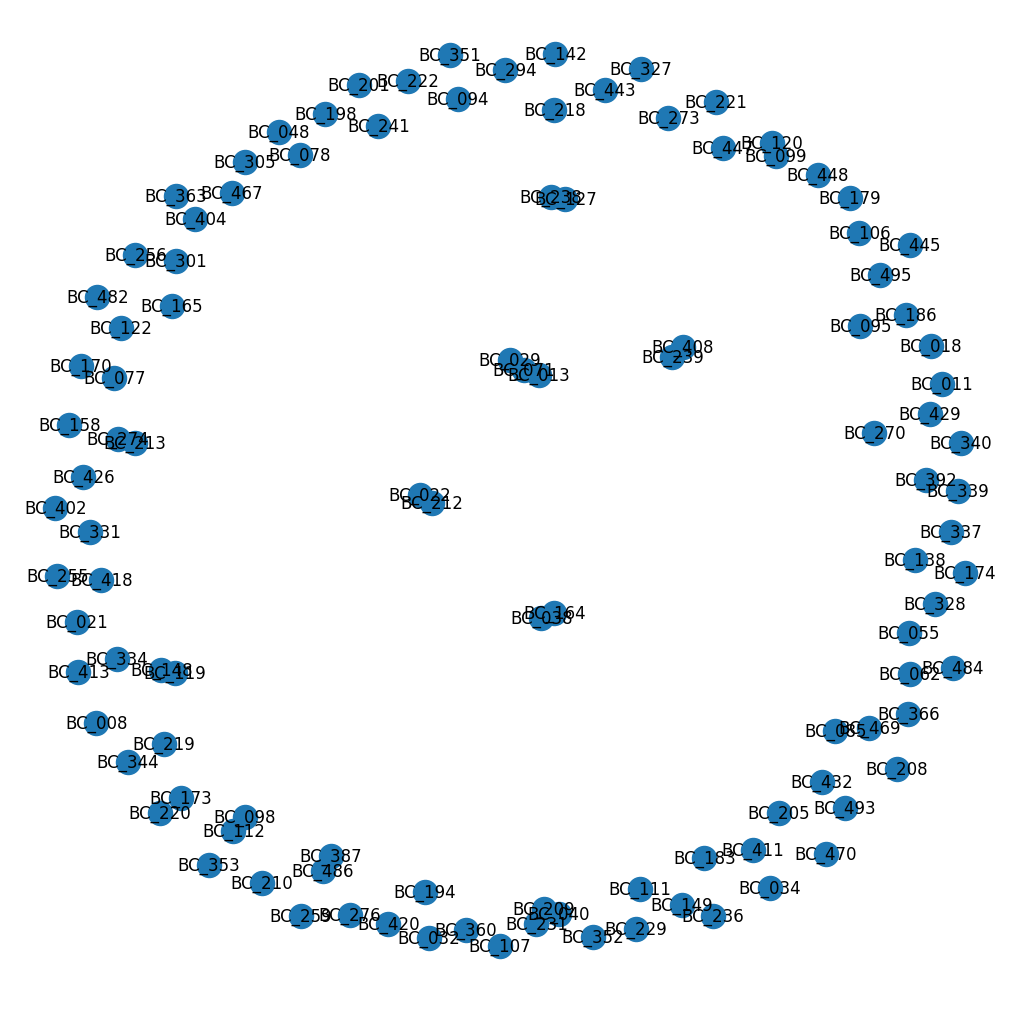

In [390]:
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True)


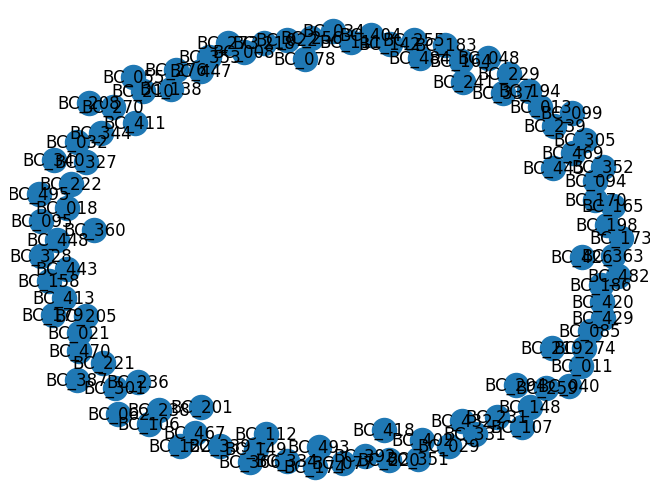

In [392]:
# G = G.remove_node('BC_485')

independent_G =  nx.maximal_independent_set(G)
nx.draw(G.subgraph(independent_G), with_labels=True)

In [393]:
len(independent_G)

100

In [395]:
sorted(independent_G)

['BC_008',
 'BC_011',
 'BC_013',
 'BC_018',
 'BC_021',
 'BC_022',
 'BC_029',
 'BC_032',
 'BC_034',
 'BC_040',
 'BC_048',
 'BC_055',
 'BC_062',
 'BC_077',
 'BC_078',
 'BC_085',
 'BC_094',
 'BC_095',
 'BC_099',
 'BC_106',
 'BC_107',
 'BC_111',
 'BC_112',
 'BC_122',
 'BC_138',
 'BC_142',
 'BC_148',
 'BC_149',
 'BC_158',
 'BC_164',
 'BC_165',
 'BC_170',
 'BC_173',
 'BC_174',
 'BC_179',
 'BC_183',
 'BC_186',
 'BC_194',
 'BC_198',
 'BC_201',
 'BC_205',
 'BC_208',
 'BC_210',
 'BC_218',
 'BC_219',
 'BC_220',
 'BC_221',
 'BC_222',
 'BC_229',
 'BC_231',
 'BC_236',
 'BC_238',
 'BC_239',
 'BC_241',
 'BC_255',
 'BC_256',
 'BC_259',
 'BC_270',
 'BC_273',
 'BC_274',
 'BC_276',
 'BC_294',
 'BC_301',
 'BC_305',
 'BC_327',
 'BC_328',
 'BC_331',
 'BC_334',
 'BC_337',
 'BC_339',
 'BC_340',
 'BC_344',
 'BC_351',
 'BC_352',
 'BC_353',
 'BC_360',
 'BC_363',
 'BC_366',
 'BC_387',
 'BC_392',
 'BC_402',
 'BC_404',
 'BC_411',
 'BC_413',
 'BC_418',
 'BC_420',
 'BC_426',
 'BC_429',
 'BC_432',
 'BC_443',
 'BC_445',

In [399]:
final_list = many_probes[many_probes['bc_id'].isin(independent_G)]

In [ ]:
fina

In [396]:
from Bio.Blast import NCBIWWW

In [398]:
sequence_data = open(f'{method}/random_sequences.fasta').read() 
result_handle = NCBIWWW.qblast("blastn", "nt", sequence_data) 

KeyboardInterrupt: 